<a href="https://colab.research.google.com/github/Henrxque/Pandas-Input-and-Output-/blob/main/Pandas_IO_aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [3]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [4]:
frames = [nomes_f, nomes_m]

In [5]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
125,BENEDITA
94,SABRINA
146,WILIAN
187,ELTON
115,TALITA


# Incluindo ID dos alunos

In [8]:
import numpy as np
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
total_alunos

400

In [10]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [11]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [13]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import html5lib

In [18]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

HTTPError: ignored

In [ ]:
type(cursos)

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

In [ ]:
cursos.head()

In [19]:
lista_curso = ['Lógica de Programação','Java para Web', 'Java para Web','Ruby on Rails','Cursos de Python','PHP com MySql']
lista_curso

['Lógica de Programação',
 'Java para Web',
 'Java para Web',
 'Ruby on Rails',
 'Cursos de Python',
 'PHP com MySql']

In [20]:
cursos = pd.DataFrame(lista_curso)
cursos.columns = ['Nome_do_Curso']
cursos.head()

,Nome_do_Curso
0,Lógica de Programação
1,Java para Web
2,Java para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [21]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [22]:
cursos.head(2)

,Nome_do_Curso
0,Lógica de Programação
1,Java para Web


In [23]:
cursos['id'] = cursos.index + 1

In [24]:
cursos.head()

,Nome_do_Curso,id
0,Lógica de Programação,1
1,Java para Web,2
2,Java para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [25]:
cursos = cursos.set_index('id')

In [26]:
cursos.head(5)

,Nome_do_Curso
id,
1,Lógica de Programação
2,Java para Web
3,Java para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [27]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [28]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int) 

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [30]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [31]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


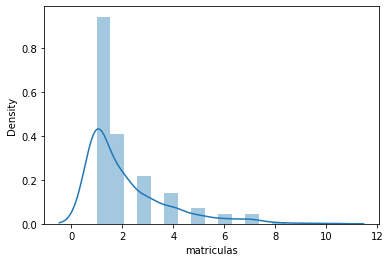

In [32]:
sns.distplot(nomes.matriculas)

In [33]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2


# Selecionando cursos

In [35]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,2
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,1


In [39]:
todas_matriculas = []
x = np.random.rand(6)
prob = x  / sum(x)

In [40]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
    
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [42]:
matriculas.head()

,id_aluno,id_curso
0,235,3
1,235,5
2,43,1
3,43,1
4,43,5


In [44]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_Curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,Nome_do_Curso
id_curso,,
1,187,Lógica de Programação
2,208,Java para Web
3,109,Java para Web
4,2,Ruby on Rails
5,211,Cursos de Python
6,142,PHP com MySql


In [45]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
60,JEFERSON,98,@servicodoemail.com,jeferson@servicodoemail.com,2
75,NELSON,392,@dominiodoemail.com.br,nelson@dominiodoemail.com.br,7
68,CAIO,283,@dominiodoemail.com.br,caio@dominiodoemail.com.br,1


In [46]:
cursos.head()

,Nome_do_Curso
id,
1,Lógica de Programação
2,Java para Web
3,Java para Web
4,Ruby on Rails
5,Cursos de Python


In [47]:
matriculas.head()

,id_aluno,id_curso
0,235,3
1,235,5
2,43,1
3,43,1
4,43,5


In [49]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_Curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [50]:
matriculas_por_curso.head()

,quantidade_de_alunos,Nome_do_Curso
id_curso,,
1,187,Lógica de Programação
2,208,Java para Web
3,109,Java para Web
4,2,Ruby on Rails
5,211,Cursos de Python


# Saída em diferentes formatos

In [51]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,Nome_do_Curso
id_curso,,
1,187,Lógica de Programação
2,208,Java para Web
3,109,Java para Web


In [52]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [53]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,Nome_do_Curso
0,187,Lógica de Programação
1,208,Java para Web
2,109,Java para Web
3,2,Ruby on Rails
4,211,Cursos de Python
5,142,PHP com MySql


In [54]:
matriculas_json = matriculas_por_curso.to_json()

In [55]:
matriculas_json

'{"quantidade_de_alunos":{"1":187,"2":208,"3":109,"4":2,"5":211,"6":142},"Nome_do_Curso":{"1":"L\\u00f3gica de Programa\\u00e7\\u00e3o","2":"Java para Web","3":"Java para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql"}}'

In [56]:
matriculas_html = matriculas_por_curso.to_html()

In [57]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>Nome_do_Curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>187</td>
      <td>Lógica de Programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>208</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>109</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>211</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>142</td>
      <td>PHP com MySql</td>
    </tr>
  </tbody>
</table>


# Criando o banco sql

In [58]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from sqlalchemy import create_engine, MetaData, Table

In [60]:
engine = create_engine('sqlite:///:memory:')

In [61]:
engine

Engine(sqlite:///:memory:)

In [62]:
type(engine)

sqlalchemy.engine.base.Engine

In [63]:
matriculas_por_curso.to_sql('matriculas', engine)

In [64]:
print(engine.table_names())

['matriculas']


<ipython-input-64-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Buscando do banco sql

In [65]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [66]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,Nome_do_Curso
0,4,2,Ruby on Rails


In [68]:
pd.read_sql_table('matriculas', engine, columns=['Nome_do_Curso', 'quantidade_de_alunos'])

,Nome_do_Curso,quantidade_de_alunos
0,Lógica de Programação,187
1,Java para Web,208
2,Java para Web,109
3,Ruby on Rails,2
4,Cursos de Python,211
5,PHP com MySql,142


In [70]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nome_do_Curso', 'quantidade_de_alunos'])

In [71]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [72]:
muitas_matriculas

,Nome_do_Curso,quantidade_de_alunos
0,Lógica de Programação,187
1,Java para Web,208
2,Java para Web,109
4,Cursos de Python,211
5,PHP com MySql,142


# Escrevendo no banco

In [73]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [74]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


<ipython-input-74-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos e alunas da próxima turma

In [75]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,Nome_do_Curso
id_curso,,
1,187,Lógica de Programação
2,208,Java para Web
3,109,Java para Web
4,2,Ruby on Rails
5,211,Cursos de Python
6,142,PHP com MySql


In [76]:
matriculas

,id_aluno,id_curso
0,235,3
1,235,5
2,43,1
3,43,1
4,43,5
...,...,...
854,383,6
855,366,3
856,366,1
857,366,5


In [95]:
id_curso = 4
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
123,14,4
463,208,4


In [96]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
11,GABRIEL,219,@servicodoemail.com,gabriel@servicodoemail.com,2
149,ISRAEL,65,@dominiodoemail.com.br,israel@dominiodoemail.com.br,1
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com,3


In [97]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
14,4,SUELI,@dominiodoemail.com.br,sueli@dominiodoemail.com.br,6
208,4,LUIZ,@servicodoemail.com,luiz@servicodoemail.com,6


In [81]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
14     SUELI
208     LUIZ
Name: nome, dtype: object

In [98]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
14,SUELI
208,LUIZ


In [99]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_Curso    Ruby on Rails
Name: 4, dtype: object

In [100]:
nome_curso = nome_curso.Nome_do_Curso
nome_curso

'Ruby on Rails'

In [101]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [91]:
proxima_turma

,nome
id_aluno,
14,SUELI
208,LUIZ


In [102]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [106]:
proxima_turma.sample(2)

,Alunos do curso de Ruby on Rails
id_aluno,
14,SUELI
208,LUIZ
